<a href="https://colab.research.google.com/github/jonhsel/Data-Science/blob/master/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jonh Selmo

#MATPLOTLIB

In [ ]:
#importando
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#gerar valores demonstrativos

#O argumento é o valor da semente; Mesmo valor de semente, trás mesmos resultados; 
#o np.random.seed() deve ser utilizado com outra função np.random (sozinha ela não faz nada)
np.random.seed(42)
x = np.arange(10)
y = np.random.normal(size=10)

In [ ]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]


#PYPLOT

Plotar um único gráfico

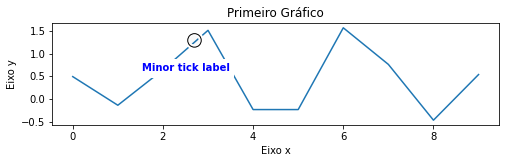

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


#plotar valores
plt.plot(x,y)
plt.title('Primeiro Gráfico')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')

circle(2.70, 1.30)
text(2.50, 0.80, "Minor tick label")

plt.show()

#ABORDAGEM OO

Ao criar apenas `plt.plot()`, se trabalha com apenas um `axes`. 

[]

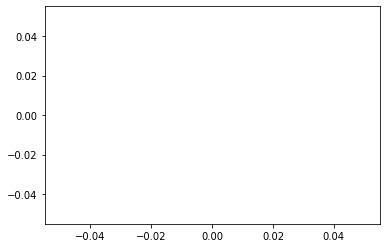

In [ ]:
plt.plot()

A forma de chamada orientada a objetos, permite a manipulação dos `axes`.

Como não foi passado nada por parâmetro, a chamada gerou apenas um `axes` (plot) na `figure`.

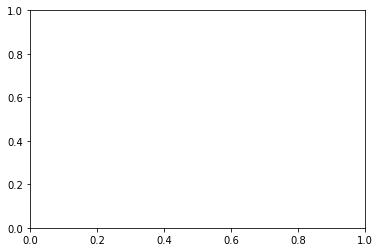

In [ ]:
fig, ax = plt.subplots()

Plotar duas funções, uma x e outra x**2.

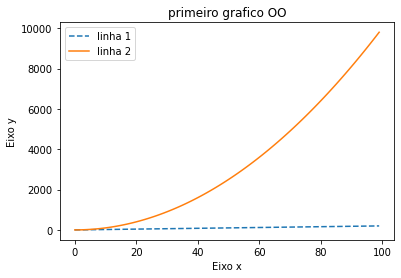

In [ ]:
#definicção dos valores de x
x = np.arange(0, 100)

#fig e axes
fig, ax = plt.subplots()
ax.plot(x, x+x, '--', label ='linha 1' )
ax.plot(x, x**2, label='linha 2')
ax.set_title('primeiro grafico OO')
ax.set_xlabel('Eixo x')
ax.set_ylabel('Eixo y')
ax.legend()

#chamada da figura
fig.show()

Agora podemos trabalhar com manipulação de plots

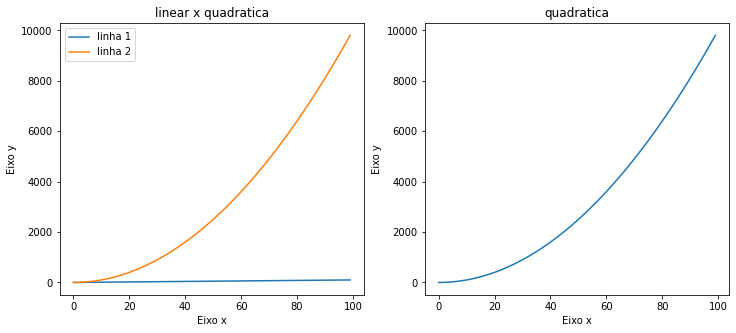

In [ ]:
#plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

#manipulação dos axes
ax[0].plot(x, x, label='linha 1')
ax[0].plot(x, x**2, label = 'linha 2')
ax[0].set_title('linear x quadratica')
ax[0].set_xlabel('Eixo x')
ax[0].set_ylabel('Eixo y')
ax[0].legend()

ax[1].plot(x, x**2, label='linha 2')
ax[1].set_title('quadratica')
ax[1].set_xlabel('Eixo x')
ax[1].set_ylabel('Eixo y')

#chamando a figura
fig.show()

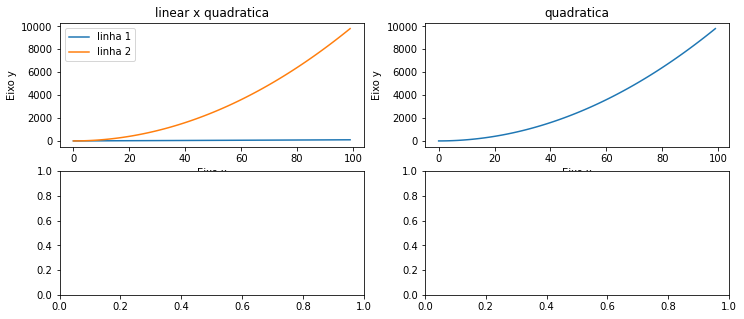

In [ ]:
#plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,5))

#manipulação dos axes
ax[0][0].plot(x, x, label='linha 1')
ax[0][0].plot(x, x**2, label = 'linha 2')
ax[0][0].set_title('linear x quadratica')
ax[0][0].set_xlabel('Eixo x')
ax[0][0].set_ylabel('Eixo y')
ax[0][0].legend()

ax[0][1].plot(x, x**2, label='linha 2')
ax[0][1].set_title('quadratica')
ax[0][1].set_xlabel('Eixo x')
ax[0][1].set_ylabel('Eixo y')

#chamando a figura
fig.show()



#GRÁFICO DE LINHAS

In [ ]:
#PANDAS
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#DATA SET
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv"


In [ ]:
df = pd.read_csv(DATA_PATH)
df.head()

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


Transformar em Datetime

In [ ]:
df.data = pd.to_datetime(df.data)
df.dtypes

data                    datetime64[ns]
casos-confirmados                int64
chuva                          float64
temperatura-media              float64
temperatura-mininima           float64
temperatura-maxima             float64
dtype: object

Transformar data em index

In [ ]:
df.set_index('data', inplace=True)
df.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


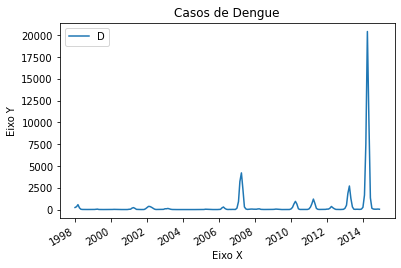

In [ ]:
#plotar casos de dengue 

#chamar modo OO
fig, ax = plt.subplots()

#1º caso
#df['casos-confirmados'].plot(kind='line', ax=ax) # é uma frma

#2º caso
ax.plot('casos-confirmados', data=df)
ax.set_title('Casos de Dengue')
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.legend('Distribuicao')
#auto ajuste dos xlabel
fig.autofmt_xdate() 

plt.show()

Gráficos aninhados

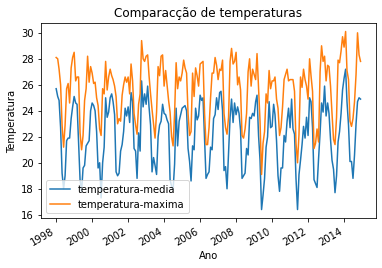

In [ ]:
fig, ax = plt.subplots()

ax.plot('temperatura-media', data=df )
ax.plot('temperatura-maxima', data=df)
ax.set_title('Comparacção de temperaturas')
ax.set_xlabel('Ano')
ax.set_ylabel('Temperatura')
ax.legend()
fig.autofmt_xdate()

plt.show()


Filtro de valores

Como a data é o indice, podemos utilizar o metodo loc

In [ ]:
#Plotar valores
#Selecionar faixa de valores
df_select = df.loc['2010-01-01':'2013-12-31', 'casos-confirmados']
df_select.head()


data
2010-01-01     65
2010-02-01    249
2010-03-01    626
2010-04-01    942
2010-05-01    630
Name: casos-confirmados, dtype: int64

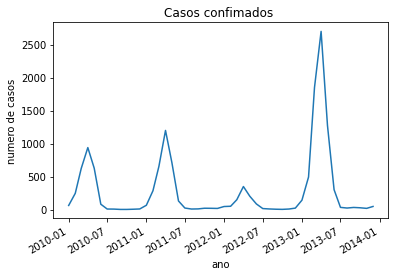

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_select, label='Gráfico comparativo')
ax.set_title('Casos confimados ')
ax.set_xlabel('ano')
ax.set_ylabel('numero de casos')
fig.autofmt_xdate()
plt.show()

##Subplots

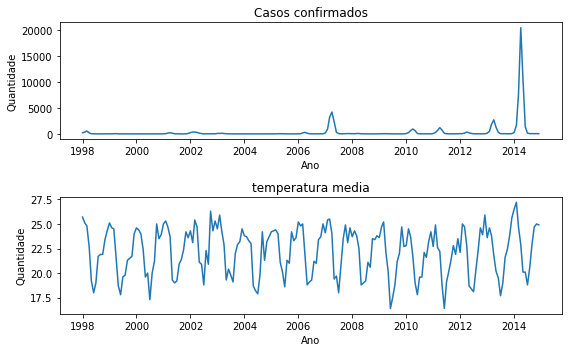

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5))

ax[0].plot('casos-confirmados', data=df)
ax[0].set_title('Casos confirmados')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Quantidade')
#fig.autofmt_xdate()

ax[1].plot('temperatura-media', data=df)
ax[1].set_title('temperatura media')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Quantidade')
#fig.autofmt_xdate()

#ajusta melhor enquadramento dos gráficos
plt.tight_layout()

plt.show()

#HISTOGRAMA



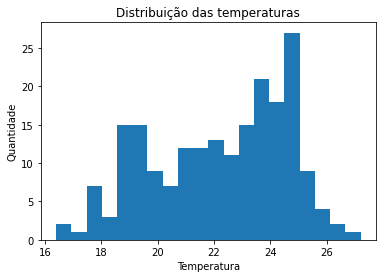

In [ ]:
fig, ax = plt.subplots()

#chama o histograma no lugar de plot
ax.hist('temperatura-media', data=df, bins=20)
ax.set_title('Distribuição das temperaturas')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Quantidade')

plt.show()

##Densidade e cor

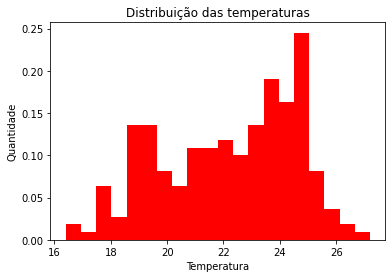

In [ ]:
fig, ax = plt.subplots()

#chama o histograma no lugar de plot
#density
ax.hist('temperatura-media', data=df, bins=20, color='red', density=True)
ax.set_title('Distribuição das temperaturas')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Quantidade')

plt.show()

#GRÁFICO DE BARRAS

In [ ]:
#importacao
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/entrada_passageiro_linha1.csv"

df_metro = pd.read_csv(DATA_PATH)
df_metro.head()

,Estação,Entradas
0,Jabaquara,90.0
1,Conceição,40.0
2,São Judas,20.0
3,Saúde,36.0
4,Praça da Árvore,22.0


In [ ]:
df_metro.tail()

,Estação,Entradas
19,Santana,64.000
20,Jardim São Paulo-Ayrton Senna,14.000
21,Parada Inglesa,16.000
22,Tucuruvi,70.000
23,TOTAL,1.425


In [ ]:
df_metro.drop(index=23, axis=0)

,Estação,Entradas
0,Jabaquara,90.0
1,Conceição,40.0
2,São Judas,20.0
3,Saúde,36.0
4,Praça da Árvore,22.0
5,Santa Cruz,108.0
6,Vila Mariana,25.0
7,Ana Rosa¹,88.0
8,Paraíso¹,115.0
9,Vergueiro,30.0


In [ ]:
df_metro = df_metro.drop(index=23, axis=0)

#outra alternativa seria essa, para não fazer df_metro receber df_metro..., como fiz acima
#df.drop(index=23, axis=0, inplace=True)

In [ ]:
df_metro.tail()

,Estação,Entradas
18,Carandiru,15.0
19,Santana,64.0
20,Jardim São Paulo-Ayrton Senna,14.0
21,Parada Inglesa,16.0
22,Tucuruvi,70.0


##Plotar o gráfico


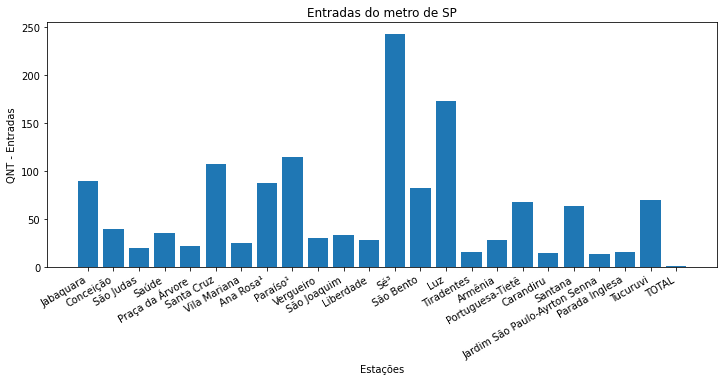

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

ax.bar('Estação', 'Entradas', data = df_metro, )
ax.set_title('Entradas do metro de SP')
ax.set_xlabel('Estações')
ax.set_ylabel('QNT - Entradas')
ax.set_label(True)
#fig.tight_layout
fig.autofmt_xdate()

#SCATTER PLOT

Ele permite plotar de maneira bidimensional a relação existente entre duas variáveis.

In [ ]:
#importe das bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt

#definir o caminho
data_path2 = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/housing.csv"

#criação do dataframe
df_h = pd.read_csv(data_path2)

#verificação das colunas
df_h.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Plotando o scatter plot

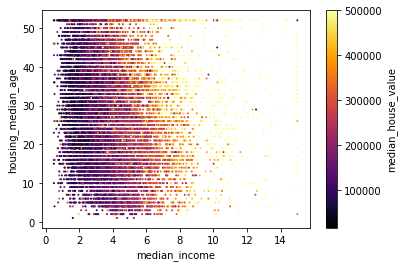

In [ ]:
#criando os elementos dos graficos
fig, ax = plt.subplots()

#definindo os atributos dos gráficos
#x = eixo x, y = eixo y, fonte dos dados "data=df", tamanho dos scatters
#obs: A forma abaixo não disponibilizou o colobar(legenda das cores)
#ax.scatter(x='median_income', y='median_house_value', data=df_h, s=1, c='housing_median_age', cmap='viridis') 

#segunda forma de plotar - maneira não OO (orientada a objeto)
df_h.plot.scatter(x='median_income', y='housing_median_age', ax=ax, s=1, c='median_house_value', cmap='inferno')
#viridis, viridis_r(reversa), bone, winter, inferno
#link: https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

#atributos


plt.show()

#BOX PLOT

In [ ]:
#bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#definindo o caminho
DATA_PATH_DENGUE = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv"

#criando dataframe
df_boxplot = pd.read_csv(DATA_PATH_DENGUE)
df_boxplot.head()


,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


Criando gráficos do boxplot

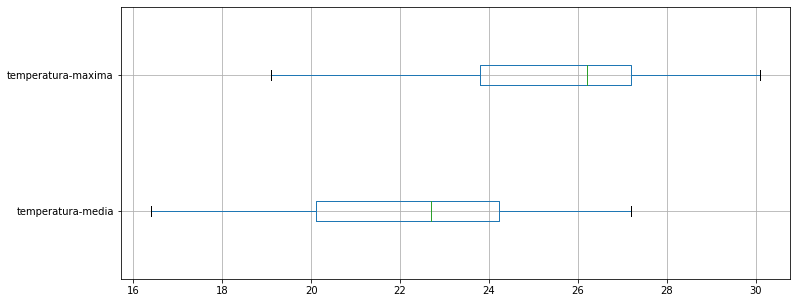

In [ ]:
fig, ax = plt.subplots( figsize=(12,5))

#ax[0].boxplot('temperatura-media', data=df_boxplot)
#ax[1].boxplot(['temperatura-media', 'temperatura-maxima'], data=df_boxplot)
#df_boxplot.boxplot('temperatura-media', ax=ax)
#ou
df_boxplot.boxplot(['temperatura-media', 'temperatura-maxima'], ax=ax, vert=False)
#vert = é o parametro para orientação
plt.show()

Vendo casos de outileiers. Utilizaremos a serie de casos confirmados. 

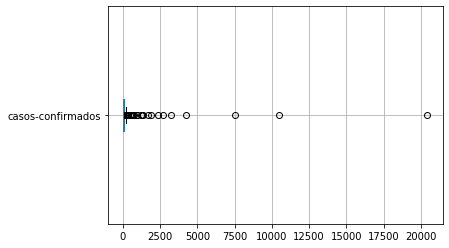

In [ ]:
fig, ax = plt.subplots()
df_boxplot.boxplot('casos-confirmados', ax=ax, vert=False)
plt.show()

Utilizando o loc para fazer o fatiamento

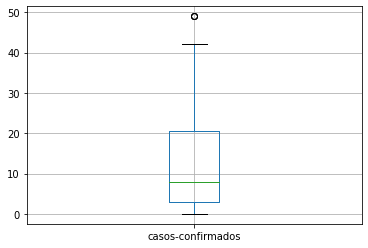

In [39]:
fig, ax = plt.subplots()
df_boxplot.loc[df_boxplot['casos-confirmados']<50].boxplot('casos-confirmados', ax=ax)
plt.show()

In [41]:
df_boxplot[].describe()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
count,204.000000,196.000000,204.000000,204.000000,204.000000
mean,357.539216,116.650000,22.200980,17.679412,25.565196
std,1741.814759,96.631613,2.399363,3.336316,2.249864
min,0.000000,0.800000,16.400000,8.200000,19.100000
25%,6.000000,43.850000,20.100000,15.075000,23.800000
50%,17.500000,86.650000,22.700000,18.150000,26.200000
75%,84.500000,177.925000,24.225000,20.400000,27.200000
max,20428.000000,452.800000,27.200000,23.500000,30.100000


#GRÁFICO WAFFLE

Documentação para consulta: [link](https://pywaffle.readthedocs.io/en/latest/class.html)

O pacote waffle não vem por padrão no matplotlib, devendo ser adicionado. 


In [2]:
!pip install pywaffle -q

     |████████████████████████████████| 532kB 3.5MB/s 


In [3]:
#importe das bibliotecas necessárias
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [ ]:
#chamada da biblioteca waffle
fig = plt.figure(
    FigureClass= Waffle,
    rows = 4,
    columns = 10,
    values = {'bolacaha': 27, 'biscoito': 50, 'salgadinho': 23 },
    legend={'loc':'upper left',#deixa a legenfa no canto superior esquerdo
            'bbox_to_anchor': (1.1, 1) #coloca a legenda para fora do gráfico
            }

)
#fig.set_tight_layout(False)

fig.show()

Alterando os ícones

<function matplotlib.pyplot.show>

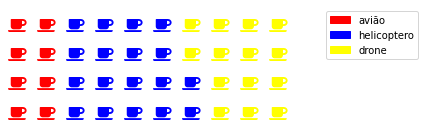

In [30]:
fig = plt.figure(
    FigureClass = Waffle,
    rows = 4,
    columns = 10,
    colors = ('red', 'blue', 'yellow'),
    icons='coffee',#'coffee',#'plane', https://fontawesome.com/icons?d=gallery&m=free
    icon_size = 15,
    values = {
        'avião': 12,
        'helicoptero': 25,
        'drone': 20
    },
    legend={'loc': 'upper left',
            'bbox_to_anchor':(1.1,1)}

)

plt.show

#WORLDCLOUD

In [32]:
#instalação dos pacotes necessários
!pip install wordcloud -q

In [33]:
#importe dos pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [95]:
#criação do data frame
df_nuvemp = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/data/listings.csv.gz")


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [96]:
df_nuvemp.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20200524171540,2020-05-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. Please contact ...,"- Beautiful, sunny 2 bedroom (90 square meters...",Discounts for long term stays. Please contact ...,none,This is the one of the bests spots in Rio. Bec...,NaN,Excellent location. Close to all major attract...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,$0.00,7,180,7,7,1125,1125,7.0,1125.0,3 months ago,t,23,53,83,335,2020-05-25,251,23,2010-07-15,2020-04-06,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,moderate,f,f,1,1,0,0,2.09
1,21280,https://www.airbnb.com/rooms/21280,20200524171540,2020-05-25,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,Immaculately renovated top-floor apartment in ...,Immaculately renovated top-floor apartment ove...,none,This is the best neighborhood in Zona Sul. Fo...,NaN,The new metro station is just a few steps away...,"This is an older ""Art Deco"" style building, so...",Someone will be there at check in and check ou...,This is a booking agreement for rental of a tw...,NaN,NaN,https://a0.muscache.com/im/pictures/60851312/b...,NaN,81163,https://www.airbnb.com/users/show/81163,Jules,2010-02-14,"Chicago, Illinois, United States",Hi I am Jules and I have a beautiful apartment...,within a few hours,100%,90%,f,https://a0.muscache.com/im/users/81163/profile...,https://a0.muscache.com/im/users/81163/profile...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,...,$0.00,5,30,5,5,30,30,5.0,30.0,3 months ago,t,30,60,90,90,2020-05-25,94,6,2014-02-14,2020-03-22,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.23
2,25026,https://www.airbnb.com/rooms/25026,20200524171540,2020-05-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renov

será utilizado a coluna summary, onde existe a descrição dos imóveis. Verificação de valores ausentes!

In [98]:
df_nuvemp.shape

(35793, 106)

In [99]:
print('Quantidade de valores ausentes:', df_nuvemp.summary.isnull().sum())

Quantidade de valores ausentes: 2577


Eliminar os valore ausentes

In [100]:
df_summary = df_nuvemp.summary


In [104]:
df_summary.head()

0    Discounts for long term stays. Please contact ...
1    Immaculately renovated top-floor apartment ove...
2    Our apartment is a little gem, everyone loves ...
3    This nice and clean 1 bedroom apartment is loc...
4    This cosy apartment  is just a few steps away ...
Name: summary, dtype: object

In [101]:
df_summary.shape

(35793,)

In [113]:
df_summary.isnull().sum()

0

In [105]:
df_summary.dropna(axis=0, inplace=True)

In [114]:
df_summary.head()
print('Valores ausentes: ', df_nuvemp.summary.isnull().sum())
print('Valor anterior da coluna: ' + str(df_nuvemp.summary.shape[0]))
print('Valor da nova coluna:     ' + str(df_summary.shape[0]))
print('Valores excluídos:        ' + str(df_nuvemp.summary.isnull().sum() ))

Valores ausentes:  0
Valor anterior da coluna: 33216
Valor da nova coluna:     33216
Valores excluídos:        0


Retiramos os valores ausentes.

Próximo passo: transformar as palavras em uma string

In [109]:
df_summary.shape

(33216,)

In [111]:
#utilizar modo join para juntar as palavreas numa unica string

all_summary = " ".join(s for s in df_summary)


In [112]:
len(all_summary)

10003725

Montar a nuvem de palavras

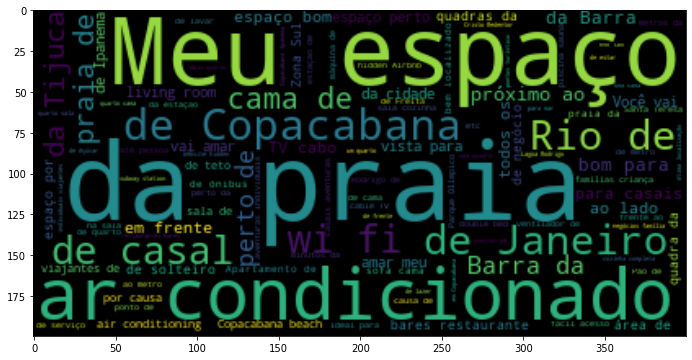

In [116]:
#Definir as stopwords
stopwords = set(STOPWORDS)

#Criar a nuvem de palavras
wordcloud = WordCloud(stopwords = stopwords,
                      background_color='black').generate(all_summary)


#criar a imagem
fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud, interpolation='bilinear')
plt.show()

Vamos incluir novas palavras no stopwords
https://amueller.github.io/word_cloud/

In [ ]:
# stopword.update([jdn, ldkcd, ldkmcld])

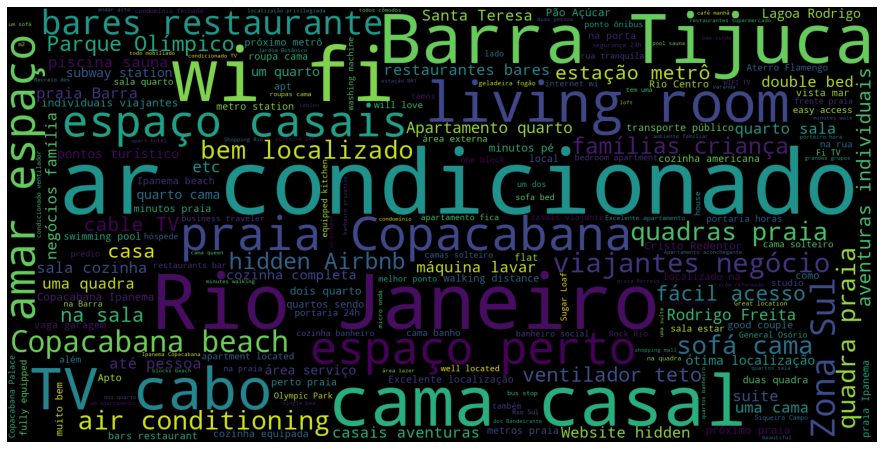

In [124]:
#definir os stopwords
stopwords = set(STOPWORDS)
stopwords.update(['meu', 'de', 'da', 'os', 'as', 'a', 'o', 'ao', 'em', 'você', 'vai', 'para', 'por', 'causa', 'bom'])

#criar a nuvem
wordcloud = WordCloud(stopwords=stopwords,
                      background_color = 'black',
                      width=1600, height=800).generate(all_summary)

#imagem
fig, ax = plt.subplots(figsize=(16,8))

ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

#plt.show()
plt.imshow(wordcloud)



In [125]:
wordcloud.to_file('minha_primeira_wordcloud2.png')